### Import Dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('./datasetFinal.csv')

y = df['generated_power']
X = df.drop(columns='generated_power')

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### Training Model 
#### SVM rbf Regression
    score = 0.8504015779914551


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("SVR", SVR(C = 1.59041293, epsilon = 0.1, gamma = 1))
])

# Scale the data and fit the model
pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

print(y_pred)
print('Mean Absolute Error: ', mean_absolute_error(y_pred, y_test))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_pred,y_test)))
print('Score', pipeline.score(x_test,y_test))

[341.89582666 203.36152832 151.86834363 ... 305.00689624 249.60316183
 492.32681362]
Mean Absolute Error:  727.0463027547928
Root Mean Squared Error:  1412.4916007270629
Score -0.40143439608894815


#### Polinomial Regression
score = 0.7440280771578609

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import math

svm_poly = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_reg", SVR(C=200,epsilon = 0.85494314, gamma = 1)),
])

svm_poly.fit(x_train,y_train)

y_pred = svm_poly.predict(x_test)

print(y_pred)
print('Mean Absolute Error: ', mean_absolute_error(y_pred, y_test))
print('Root Mean Squared Error: ', math.sqrt(mean_squared_error(y_pred,y_test)))
print('score', svm_poly.score(x_test,y_test))

[1831.54239427  651.30882269  786.35365052 ...    2.18075809  -18.70565903
  277.87651096]
Mean Absolute Error:  239.52306353326617
Root Mean Squared Error:  528.31451809663
score 0.8579426107221395


In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X_train,y_train, cv=10)

NameError: name 'reg' is not defined

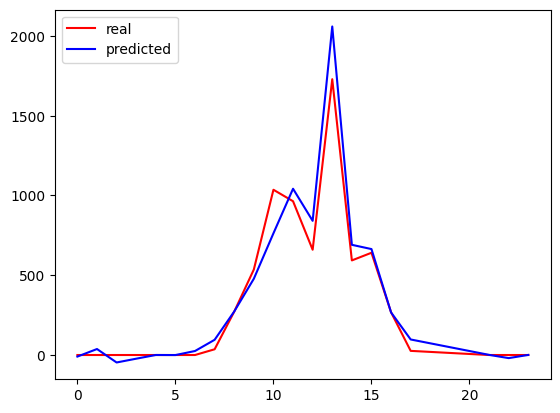

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

day = [[0,0,14,13,1021,220,3,9,95,0,0,0],
[1,0,15,14,1021,360,8,12,95,1,2,0],
[2,0,15,14,1021,271,11,17,95,0,2,0],
[3,0,15,14,1021,281,9,16,96,1,2,0],
[4,0,15,14,1021,267,4,19,96,0,3,0],
[5,0,15,14,1022,314,6,12,96,0,3,0],
[6,0,14,14,1022,232,8,14,96,0,3,0],
[7,36,14,13,1023,346,6,19,96,0,3,5],
[8,272,14,13,1024,327,9,12,96,0,3,44],
[9,536,14,14,1024,13,6,14,96,0,3,84],
[10,1036,15,15,1024,343,12,19,96,0,3,148],
[11,964,15,14,1024,319,0,12,94,0,3,171],
[12,660,16,15,1024,263,4,14,91,0,3,139],
[13,1729,16,15,1024,279,11,14,88,0,3,346],
[14,593,16,14,1024,336,6,14,88,0,3,121],
[15,641,15,14,1024,335,8,11,89,0,3,120],
[16,268,15,13,1025,340,6,14,88,0,3,51],
[17,26,14,13,1025,347,8,12,90,0,3,5],
[21,0,13,12,1026,332,8,8,93,0,3,0],
[22,0,13,12,1026,324,1,4,93,0,3,0],
[23,0,13,12,1026,345,1,1,94,0,3,0]]

df = pd.DataFrame(day, columns = ['hour','generated_power','temperatureC','dewpointC','pressurehPa','wind_direction_degrees','wind_speed_KMH','wind_speed_gustKMH','Humidity','hourly_precipMM','daily_rainMM','solar_radiation_Watts_m2']) 

y = df['generated_power']
X = df.drop(columns='generated_power')
x = df['hour']

plt.plot(x, y, color="red", label = "real")
y = svm_poly.predict(X)
plt.plot(x, y, color="blue", label = "predicted")
plt.legend(loc="upper left")
plt.show()

In [60]:
B = df.drop(columns='generated_power')
i = 19019
day = B.iloc[i]

y_test = df.iloc[i]["generated_power"]

print(day)
y_pred = svm_poly.predict([day])
print ('Real:', y_test ,'  mmh... I predict:',y_pred)

hour                          13
temperatureC                  17
dewpointC                     13
pressurehPa                 1025
wind_direction_degrees       239
wind_speed_KMH                 3
wind_speed_gustKMH             8
Humidity                      75
hourly_precipMM                0
daily_rainMM                   0
solar_radiation_Watts_m2     374
Name: 19019, dtype: int64
Real: 822   mmh... I predict: [2197.64598696]


/home/rafaelsilva/anaconda3/envs/meia/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### SVR Linear With PSO
- C = 1.59041293
- epsilon = 0.1 
- gamma = 1
- score = 0.9058933524753529


In [41]:
import matplotlib.pyplot as plt
from pyswarm import pso
from sklearn.svm import SVR

# Define the search space for the hyperparameters
lb = [1, 0.1, 1]  # lower bounds for C, epsilon, and gamma
ub = [10, 0.5, 5]  # upper bounds for C, epsilon, and gamma

# Define a global list to store the values of the fitness function
cost_history = []
hyperparameters_history = []
hyperparameters_history.append([])
hyperparameters_history.append([])
hyperparameters_history.append([])


def fitness_linear(x):
    # x is a list of hyperparameters [C, epsilon, gamma]
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("SVR", SVR(C=x[0], epsilon=x[1], gamma=x[2]))
    ])
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    
    hyperparameters_history[0].append(x[0])
    hyperparameters_history[1].append(x[1])
    hyperparameters_history[2].append(x[2])
    cost_history.append(score)  # store the value of the fitness function
    return -score  # maximize the score, so we minimize the negative score

# Run the optimization
optimal_params, score = pso(fitness_linear, lb, ub, swarmsize=10, maxiter=2)
print("optimal hyperparameters: "+ str(optimal_params))
print("score: "+ str(score))

# Plot the convergence of the optimization
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Convergence of the PSO Optimization')
plt.show()

#### SVR Polinomial With PSO
C =  Epsilon =   Gamma = 
score = 0.7440280771578609

In [ ]:
import matplotlib.pyplot as plt

# Define a global list to store the values of the fitness function
cost_history = []
hyperparameters_history = []
hyperparameters_history.append([])
hyperparameters_history.append([])
hyperparameters_history.append([])

# Define the search space for the hyperparameters
lb = [2, 1, 0.1, 1]  # lower bounds for degree, C, epsilon, and gamma
ub = [4, 10, 0.5, 5]  # upper bounds for degree, C, epsilon, and gamma

def fitness_polinomial(x):
    # x is a list of hyperparameters [C, epsilon, gamma]
    model = SVR(kernel = "poly", degree = x[0], C=x[1], epsilon=x[2], gamma=x[3])
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    hyperparameters_history[0].append(x[0])
    hyperparameters_history[1].append(x[1])
    hyperparameters_history[2].append(x[2])
    cost_history.append(score)  # store the value of the fitness function
    return -score  # maximize the score, so we minimize the negative score

# Run the optimization
optimal_params, score = pso(fitness_polinomial, lb, ub, swarmsize=10, maxiter=10)
print("optimal hyperparameters: "+ str(optimal_params))
print("score: "+ str(score))

# Plot the convergence of the optimization
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Convergence of the PSO Optimization')
plt.show()

NameError: name 'hyperparameters_history' is not defined

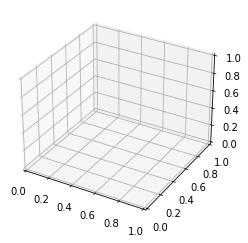

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def update(num, x, y, z):
    ax.scatter(x[:num], y[:num], z[:num], c='k', marker='o')
    ax.view_init(elev=30, azim=num)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the animation
ani = FuncAnimation(fig, update, frames=range(len(hyperparameters_history[0])-1), fargs=[hyperparameters_history[0],hyperparameters_history[1],hyperparameters_history[2]], repeat=True)

# Save the animation as an MP4 file
ani.save('animation.mp4', writer='ffmpeg', fps=30)

# Show the plot
plt.show()